## What is the purpose of a map?

This is a fun and important question to think about, since today, we will start with making our very first maps. **Talk with your team about what you think are important about maps, what often gets overlooked, and how could maps be better? How could they be worse? What do you think we learn from maps that we wouldn't know without them?**

This is a map fragment from the ancient city of Nippur in Sumeria, from about 1500 BCE: <img src="https://upmaa-pennmuseum.netdna-ssl.com/collections/assets/113404_800.jpg" width="350">

Think about how different maps are made, and how that has changed throughout history. Maps might have been drawn on dwelling walls, formed from woven sticks and seashells, drawn on papyrus or vellum. **We use google maps to navigate cities like NYC today - how do you think that was made?**

*(If you're curious, it's mostly javascript and WebGL, a coding language that we'll be using later this year.)* 

Today we'll make a 2D map of the sky in python, putting in all the positions of the stars that we are studying.

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
#this shows the plots in the jupyter notebook
#%matplotlib inline 

### Now for a new python module! ...*drumroll*... ASTROPY!

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord

When you get up to here, let's take a break to talk about coordinate systems.

=============================================================================

Excellent talk! Units and coordinate systems are really handy for orienting ourselves, and we can change between two different types of units, like inches and centimeters, by using conversion. We can also convert between coordinate systems.

Let's start the skymap tutorial by creating some random data.

In [3]:
ra_random = np.random.rand(100)*360.0 
# ^ This command uses numpy to generate 100 random coordinates from 0 to 360 degrees

dec_random = np.random.rand(100)*180.0-90.0 
# ^ This command does the same from -90 to +90 degrees. Why? Ask your teammates.

# When you get here, stop and raise your hand.

Next, we'll define our arrays (fancy word for numpy lists) as coordinates using the SkyCoord function we imported from astropy.

In [4]:
c = SkyCoord(ra=ra_random*u.degree, dec=dec_random*u.degree, frame='icrs')
# ICRS stands for International Celestial Reference System: 
# It's a standard international set of coordinates.
# The command above is taking our generated RA and DEC 
# and giving them units of degrees using the ICRS coordinate system.
# It is our first use of astropy!

**BUT** we actually prefer to plot our RA and Dec in radians instead of degrees, because matplotlib will require radians for our final map, **so we need to convert our units.**

In [5]:
ra_rad = c.ra.radian 
#^ this converts the RA from our c variable (c.ra) into radians

dec_rad = c.dec.radian
#^ this converts the Dec from our c variable (c.dec) into radians

Furthermore matplotlib needs the RA coordinate in the range between -pi and pi, not 0 and 2pi. 

We can solve this!

**If we take all values that are larger than pi (180 degrees), and subtract them by 2pi, we will  get the required range of -pi to pi.**

In [6]:
pi = np.pi #python doesn't automatically know the number for pi, so we need to tell it

# When you get here, stop and raise your hand.

In [7]:
#Can you find the index here? If you can, stand up and do jazz hands.
ra_rad[ra_rad > pi] -= 2. * pi 

### **Now we're ready to plot!**

In [8]:
fig = plt.figure(figsize=[10, 8]) 
# ^ This controls the size of the figure

ax = fig.add_subplot(111, facecolor='LightCyan')
# ^ This gives the background color

ax.scatter(ra_rad, dec_rad, marker='*')   # This plots all the points as stars
plt.grid(True)  # Turns on the grid in the back of the plot

<IPython.core.display.Javascript object>

Awesome! Now we have our sky plot, but is it the shape that we want it in? We have maps of the earth that usually look like this: <img src="https://i.stack.imgur.com/egiWd.png">

What's different about this map and our own? How do we get from our own rectangular map to the one above? We'll begin by looking at this link: https://en.wikipedia.org/wiki/Map_projection

=============================================================================================

So how do we do a projection ourselves? Once you've picked a projection, you can add one to your own plot!

Here's a hint: try copying your plot code from the previous cell, and adding `projection="aitoff"` as an argument in your fig.add_subplot function. 
(Something like ax=fig.add_subplot(111, facecolor=... , projection=...)

In [9]:
fig = plt.figure(figsize=[10, 8]) 
# ^ This controls the size of the figure

ax = fig.add_subplot(111, facecolor='Lightcyan', projection = "aitoff")
# ^ This gives the background color

ax.scatter(ra_rad, dec_rad, marker='*')   # This plots all the points as stars
plt.grid(True)  # Turns on the grid in the back of the plot

<IPython.core.display.Javascript object>

In [10]:
df = pd.read_csv('planets.csv')

In [11]:
star_mass = df['st_mass'] <=.6

In [12]:
exodf = df.loc[star_mass]

In [13]:
ra = exodf['ra']
dec = exodf['dec']
mass = exodf['st_mass']
distance = exodf['st_dist']
temp = exodf['st_teff']

In [14]:
x = distance * np.cos(dec) *np.cos(ra)
y = distance * np.cos(dec) *np.sin(ra)
z = distance * np.sin(dec)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


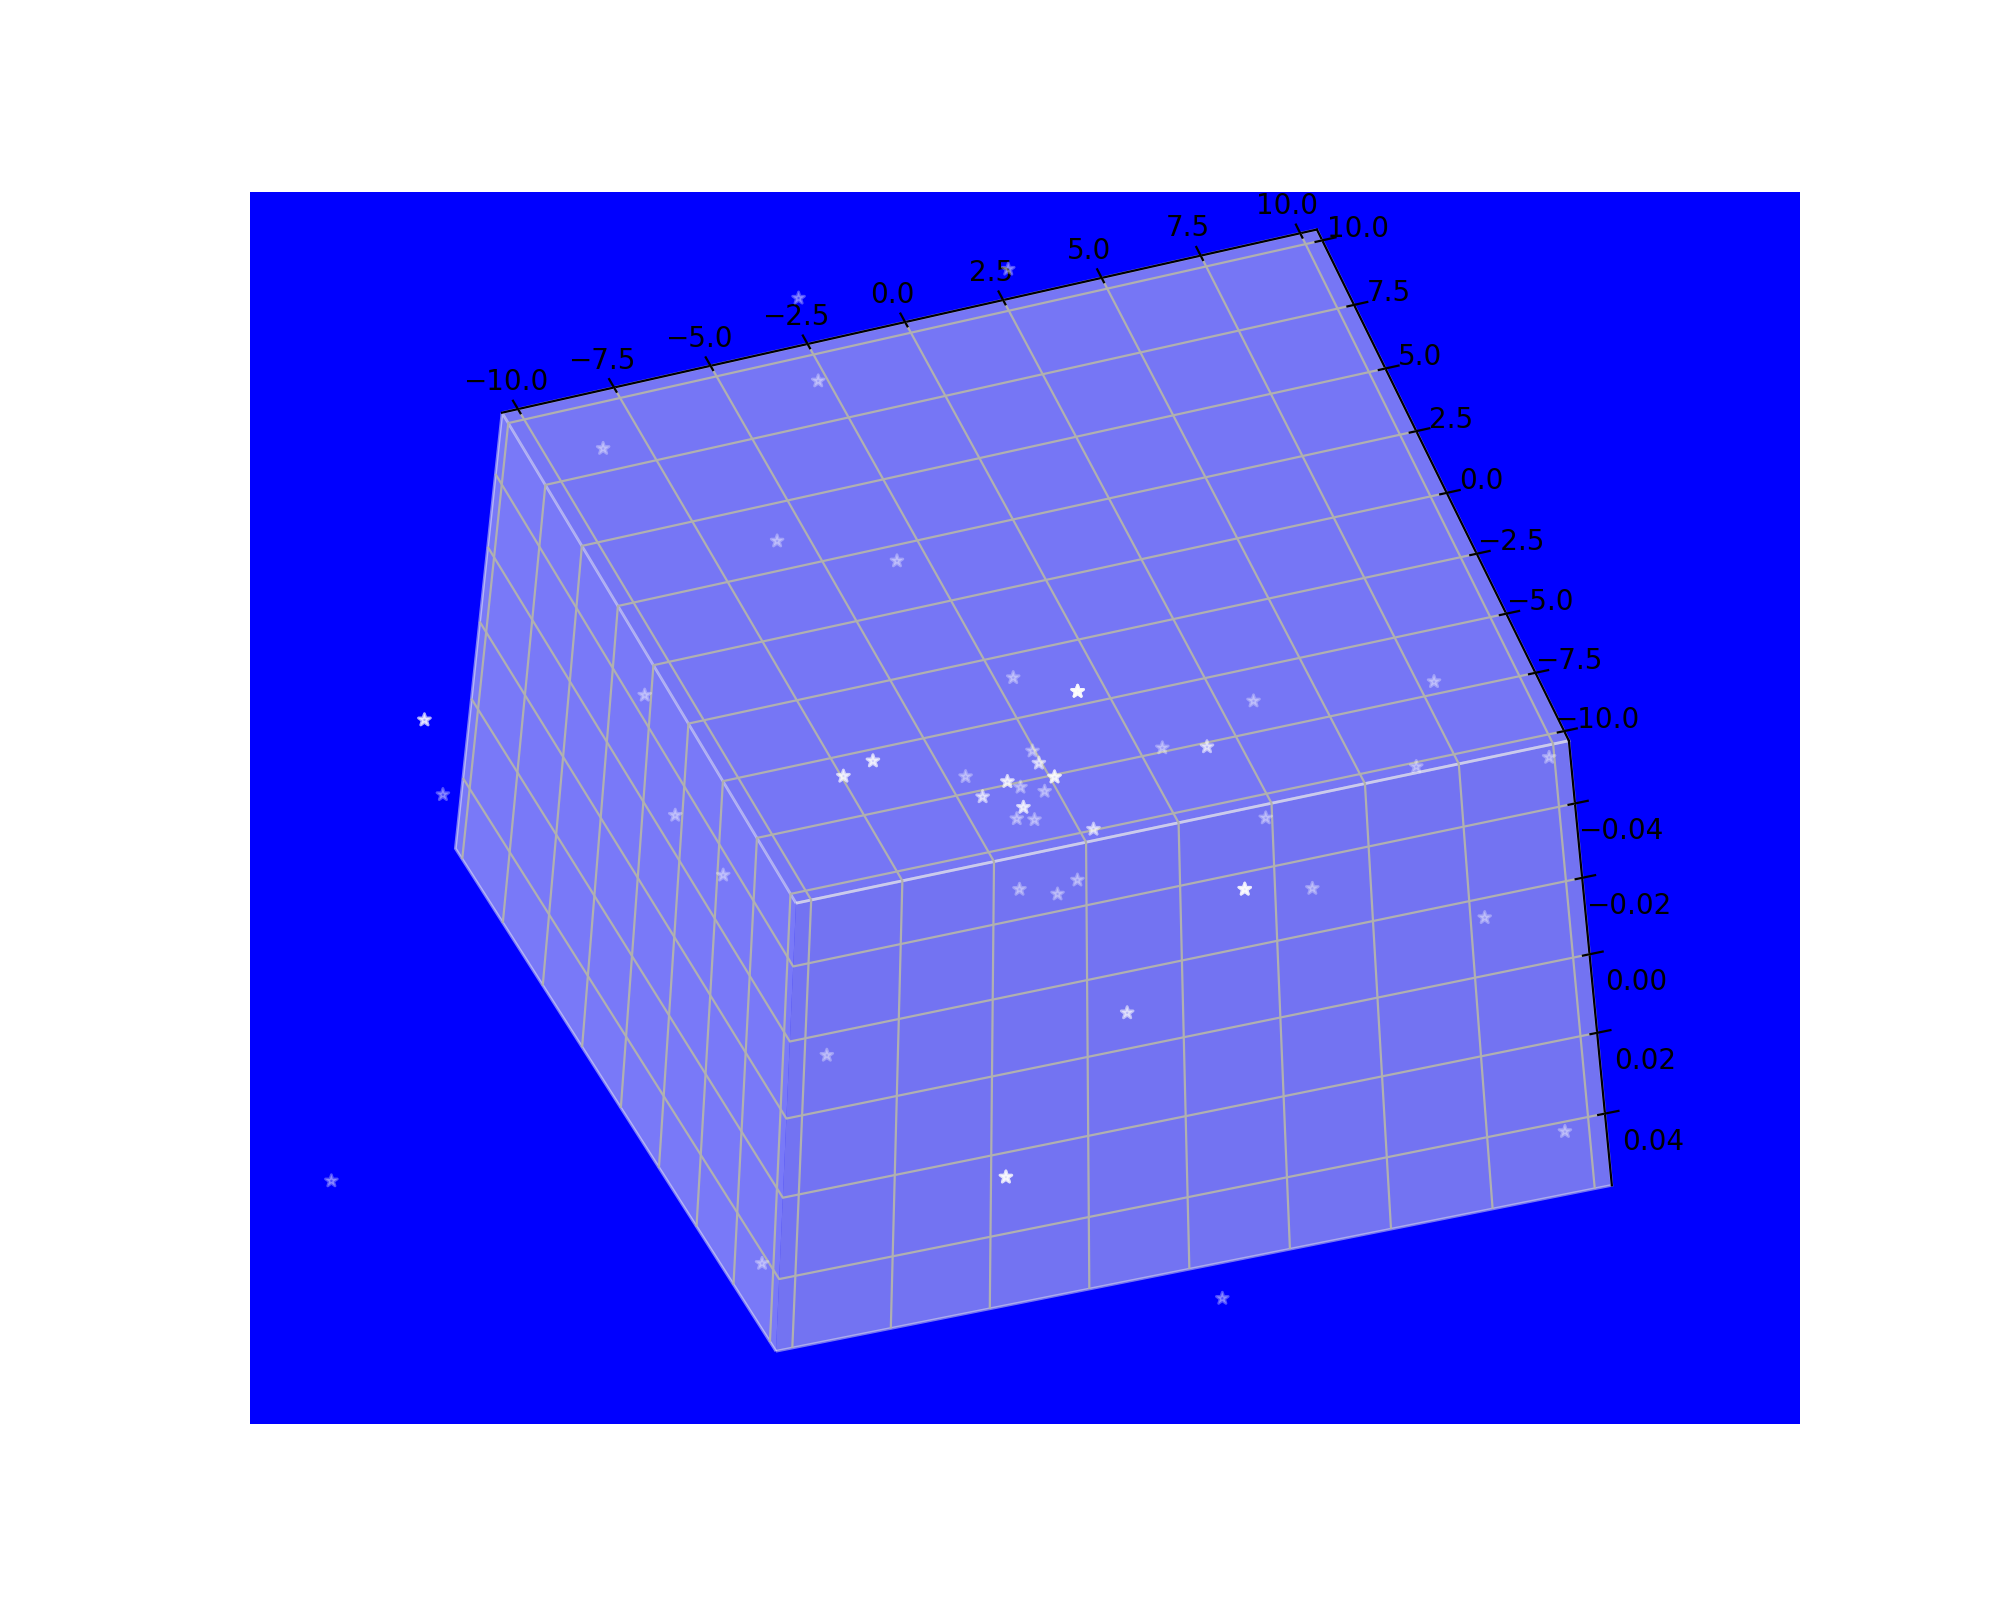

In [19]:
fig = plt.figure(figsize=[10, 8]) 
ax = fig.add_subplot(111, facecolor='Blue', projection = "3d")
ax.scatter(x,y, marker='*',color = 'w')  
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.grid(True)
